# Travail 2

#### 4.2 Exercice préliminaire

In [53]:
import weka.core.jvm as jvm
from weka.classifiers import Classifier, Evaluation
import weka.plot.graph as graph 
from weka.core.converters import Loader
import pandas as pd
import matplotlib
import weka.plot.classifiers as plcls
from weka.classifiers import PredictionOutput
import weka.associations
from weka.core.classes import Random
from weka.classifiers import Classifier
import weka.core.packages as packages
import weka.core.classes as core

In [54]:
jvm.start(packages=True)

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


#### Chargement de la base de données

In [55]:
loader = Loader(classname="weka.core.converters.ArffLoader")
data_ripper = loader.load_file('weather_nominal.arff')
data_ripper.class_is_last()
print(data_ripper)

@relation weather.symbolic

@attribute outlook {sunny,overcast,rainy}
@attribute temperature {hot,mild,cool}
@attribute humidity {high,normal}
@attribute windy {TRUE,FALSE}
@attribute play {yes,no}

@data
sunny,hot,high,FALSE,no
sunny,hot,high,TRUE,no
overcast,hot,high,FALSE,yes
rainy,mild,high,FALSE,yes
rainy,cool,normal,FALSE,yes
rainy,cool,normal,TRUE,no
overcast,cool,normal,TRUE,yes
sunny,mild,high,FALSE,no
sunny,cool,normal,FALSE,yes
rainy,mild,normal,FALSE,yes
sunny,mild,normal,TRUE,yes
overcast,mild,high,TRUE,yes
overcast,hot,normal,FALSE,yes
rainy,mild,high,TRUE,no


In [56]:
cls_ripper = Classifier(classname="weka.classifiers.rules.JRip",
                    options=["-F", "3"])

In [57]:
cls_ripper.build_classifier(data_ripper)
print(cls_ripper)

JRIP rules:

(humidity = high) and (outlook = sunny) => play=no (3.0/0.0)
(outlook = rainy) and (windy = TRUE) => play=no (2.0/0.0)
 => play=yes (9.0/0.0)

Number of Rules : 3



## Travail principal
> J'ai appliqué uniquement Ripper et DecisionTable car DTNB et Prism était introuvable par le wrapper python.

#### 1)

In [59]:
data_cars = loader.load_file('cars.arff')
data_cars.class_is_last()

#### 2)

In [60]:
cls_cars_ripper = Classifier(classname="weka.classifiers.rules.JRip",
                    options=["-F", "3"])
cls_cars_ripper.build_classifier(data_cars)
print(cls_cars_ripper)

JRIP rules:

(safety = high) and (buying = low) and (lug_boot = big) and (persons = 4) => class=vgood (16.0/4.0)
(safety = high) and (persons = more) and (buying = low) and (lug_boot = big) => class=vgood (16.0/4.0)
(safety = high) and (buying = med) and (lug_boot = big) and (maint = low) and (persons = 4) => class=vgood (4.0/0.0)
(safety = high) and (buying = med) and (maint = med) and (persons = 4) and (lug_boot = big) => class=vgood (4.0/0.0)
(safety = high) and (lug_boot = med) and (persons = more) and (buying = low) => class=vgood (16.0/7.0)
(safety = high) and (buying = med) and (maint = low) and (persons = more) and (lug_boot = big) => class=vgood (4.0/0.0)
(safety = high) and (lug_boot = med) and (buying = med) and (maint = med) and (persons = more) => class=vgood (4.0/1.0)
(safety = high) and (buying = med) and (maint = med) and (persons = more) and (lug_boot = big) => class=vgood (4.0/0.0)
(safety = high) and (lug_boot = med) and (persons = 4) and (buying = low) and (doors = 

#### 3) Les valeurs cibles de vote.arff ne sont pas nominales et PRISM s'applique uniquement à des données nominales. Il faut regrouper les valeurs cibles par classes (clustering) pour appliquer ripper à vote.arff.

In [ ]:
cls_cars_prism = Classifier(classname="weka.classifiers.rules.Prism")
cls_cars_prism.build_classifier(data_cars)
print(cls_cars_prism)

Failed to instantiate weka.classifiers.rules.Prism: weka.classifiers.rules.Prism
Class 'weka.classifiers.rules.Prism' is available from package: simpleEducationalLearningSchemes


Exception in thread "Thread-0" java.lang.ClassNotFoundException: weka.classifiers.rules.Prism
	java.net.URLClassLoader.findClass(URLClassLoader.java:387)
	java.lang.ClassLoader.loadClass(ClassLoader.java:418)
	sun.misc.Launcher$AppClassLoader.loadClass(Launcher.java:352)
	java.lang.ClassLoader.loadClass(ClassLoader.java:351)
	java.lang.Class.forName0(Native Method)
	java.lang.Class.forName(Class.java:348)
	weka.core.WekaPackageClassLoaderManager.forName(WekaPackageClassLoaderManager.java:198)
	weka.core.WekaPackageClassLoaderManager.forName(WekaPackageClassLoaderManager.java:178)
	weka.core.ResourceUtils.forName(ResourceUtils.java:80)
	weka.core.Utils.forName(Utils.java:1112)

	at java.net.URLClassLoader.findClass(URLClassLoader.java:387)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:418)
	at sun.misc.Launcher$AppClassLoader.loadClass(Launcher.java:352)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:351)
	at java.lang.Class.forName0(Native Method)
	at java.lang.Class.forNa

AssertionError: 

#### 4) Decision Table

In [ ]:
cls_decision_table = Classifier(classname="weka.classifiers.rules.DecisionTable", options=['-R'])
cls_decision_table.build_classifier(data_cars)
print(cls_decision_table)

Decision Table:

Number of training instances: 1728
Number of Rules : 432
Non matches covered by Majority class.
	Best first.
	Start set: no attributes
	Search direction: forward
	Stale search after 5 node expansions
	Total number of subsets evaluated: 22
	Merit of best subset found:   94.329
Evaluation (for feature selection): CV (leave one out) 
Feature set: 1,2,4,5,6,7

Rules:
buying   maint    persons  lug_boot safety   class  
low      low      more     big      high     vgood
med      low      more     big      high     vgood
high     low      more     big      high     acc
vhigh    low      more     big      high     acc
low      med      more     big      high     vgood
med      med      more     big      high     vgood
high     med      more     big      high     acc
vhigh    med      more     big      high     acc
low      low      4        big      high     vgood
low      high     more     big      high     vgood
med      low      4        big      high     vgood
med      hi

#### 5) DNTB

In [ ]:
cls_decision_dtnb = Classifier(classname="weka.classifiers.rules.DTNB")
cls_decision_dtnb.build_classifier(data_cars)
print(cls_decision_dtnb)

#### 6-7) On reprend la fonction du travail 1 pour afficher les métriques.
> On créer un parser pour obtenir les valeurs des différentes métriques qui sont affichées sur la sortie standard pour ensuite faire un tableau de comparaison. 

In [ ]:
def print_metrics_CV(data, model, print_model=False, numeric=False):
    """ 
    Print some metrics about the model, trained using Cross Validation
    *******
    PARAMS:
      - numeric: boolean, True if output is numeric (regression), else False
    """
    if print_model:
        print(model)

    pout = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.PlainText")
    evl = Evaluation(data)
    evl.crossvalidate_model(model, data, 10, Random(1), pout)

    print(evl.summary())
    print(f'F-measure: {evl.unweighted_macro_f_measure}')
    print(f'Area under ROC: {evl.weighted_area_under_roc}')
    if numeric:
        print(f'Correlation coefficient: {evl.correlation_coefficient}')
    if not numeric:
        print(f'Confusion matrix:\n {evl.confusion_matrix}')
    if numeric:
        plcls.plot_classifier_errors(evl.predictions, wait=True)
    if not numeric:
        plcls.plot_roc(evl, class_index=[0, 1], wait=True)


Correctly Classified Instances        1494               86.4583 %
Incorrectly Classified Instances       234               13.5417 %
Kappa statistic                          0.7216
Mean absolute error                      0.0846
Root mean squared error                  0.224 
Relative absolute error                 36.9616 %
Root relative squared error             66.2639 %
Total Number of Instances             1728     

F-measure: 0.7173867203842204
Area under ROC: 0.9468442320712798
Confusion matrix:
 [[1080.  101.   18.   11.]
 [  27.  333.    7.   17.]
 [   0.   27.   39.    3.]
 [   2.   13.    8.   42.]]


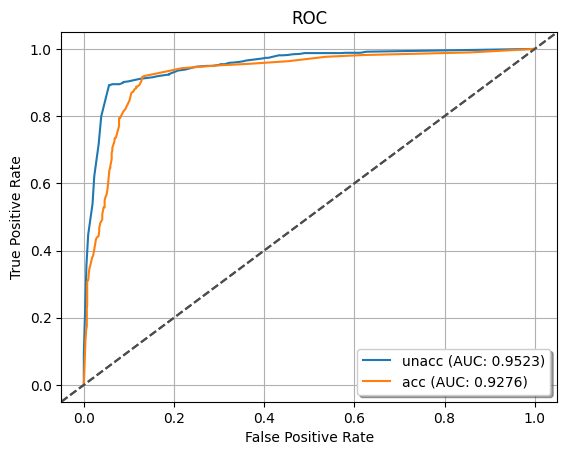


Correctly Classified Instances        1573               91.0301 %
Incorrectly Classified Instances       155                8.9699 %
Kappa statistic                          0.7987
Mean absolute error                      0.2748
Root mean squared error                  0.322 
Relative absolute error                119.9872 %
Root relative squared error             95.2225 %
Total Number of Instances             1728     

F-measure: 0.8065027953327999
Area under ROC: 0.9731671729243649
Confusion matrix:
 [[1173.   34.    3.    0.]
 [  65.  308.    9.    2.]
 [   8.   10.   45.    6.]
 [   2.    5.   11.   47.]]


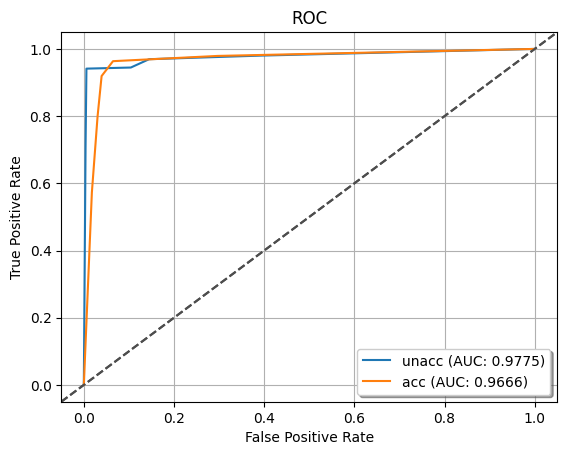

In [ ]:
print_metrics_CV(data_cars, cls_ripper, numeric=False)
print_metrics_CV(data_cars, cls_decision_table, numeric=False)

#### Commentaire des courbes ROC (multi-classes).
> La courbe ROC de la méthode Decision Table est meilleure car l'aire sous la courbe est plus proche de 1 que pour Ripper. <br>
> Avec cette courbe, on voit que le True Positive Rate peut être élevé avec un False Positive Rate peu élevé simultanément.

#### 9 - Meilleure méthode.
> Pour les deux méthodes testées, DecisionTable est la meilleure <br>
> L'accuracy est meilleure (91% vs 86%) <br>
> Le kappa est meilleur (0.80 vs 0.72) <br>
> La f-mesure est meilleure (0.81 vs 0.72) <br>
> L'aire sous la courbe ROC est plus proche de 1 (0.97 vs 0.94) <br>

#### 10 - Application de Ripper et DecisionTable à vote.arff.


Correctly Classified Instances         415               95.4023 %
Incorrectly Classified Instances        20                4.5977 %
Kappa statistic                          0.9037
Mean absolute error                      0.0838
Root mean squared error                  0.2093
Relative absolute error                 17.6705 %
Root relative squared error             42.9945 %
Total Number of Instances              435     

F-measure: 0.9518208399787347
Area under ROC: 0.9416688960228287
Confusion matrix:
 [[254.  13.]
 [  7. 161.]]


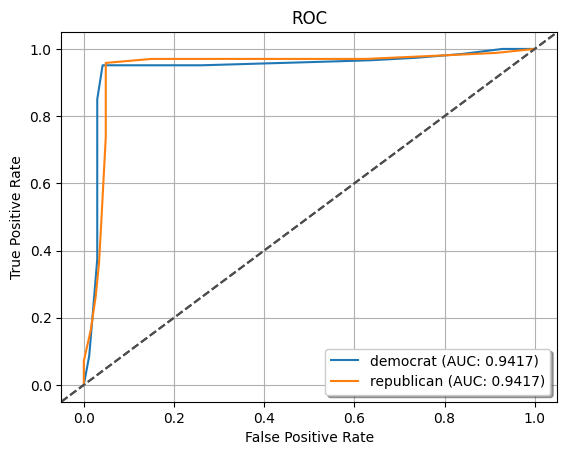


Correctly Classified Instances         413               94.9425 %
Incorrectly Classified Instances        22                5.0575 %
Kappa statistic                          0.8929
Mean absolute error                      0.0995
Root mean squared error                  0.208 
Relative absolute error                 20.9752 %
Root relative squared error             42.7262 %
Total Number of Instances              435     

F-measure: 0.9464213732252429
Area under ROC: 0.9807718031032636
Confusion matrix:
 [[258.   9.]
 [ 13. 155.]]


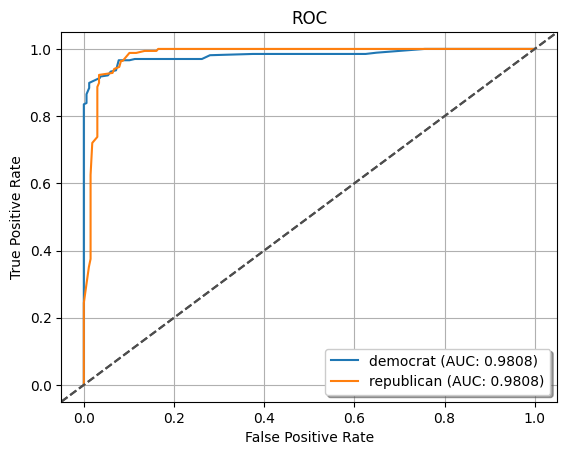

In [72]:
data_vote = loader.load_file('vote.arff')
data_vote.class_is_last()

cls_vote_ripper = Classifier(classname="weka.classifiers.rules.JRip",
                    options=["-F", "3"])
cls_vote_ripper.build_classifier(data_vote)


cls_decision_table_vote = Classifier(classname="weka.classifiers.rules.DecisionTable", options=['-R'])
cls_decision_table_vote.build_classifier(data_vote)

print_metrics_CV(data_vote, cls_vote_ripper, numeric=False)
print_metrics_CV(data_vote, cls_decision_table_vote, numeric=False)

#### 11) 
> Cette fois-ci, les métriques presques semblables, mais sont légèrement meilleures pour Ripper, sauf l'aire sous la courbe ROC, plus proche de 1 pour TableDecision (0.9807718031032636) que pour Ripper (0.941). <br>
> Il y a plus de faux négatifs pour Ripper que pour DecisionTable, mais plus de faux positifs pour DecisionTable.
> Les métriques sont calculées par validation croisées, donc ce sont des variables aléatoires qui dépendent des plis choisis. Comme les métriques sont très proches pour les 2 méthodes, que ce sont des variables aléatoires, et que le nombre de données n'est pas très élevè (435 instances), il est difficile de conclure avec certitude sur la meilleure méthode. <br>
> En considérant que seule l'aire sous la courbe ROC est significativement différente et donc discriminante entre les 2 modèles, on peut choisir DecicionTable comme meilleure méthode.

#### 12)
> Non, la fonction de décision est une variable aléatoire qui dépend des données du training set, donc les résultats dépendent de la base d'entrainement.